<a href="https://colab.research.google.com/github/Bhavin89-web/AI-ML-DL/blob/master/Kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded=files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [2]:
import io
import pandas as pd
df2=pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))

In [3]:
df2.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df2.shape

(200, 5)

In [6]:
df2.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df2.drop(['CustomerID'],axis=1,inplace=True)

In [8]:
df2.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [9]:
df2.dtypes

Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [10]:
df2.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [11]:
df2.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans

In [13]:
plt.style.use('fivethirtyeight')

In [14]:
import plotly.io as pio
pio.renderers.default='colab'

In [ ]:
#distribution of age column

In [16]:
import plotly.figure_factory as ff

In [17]:
hist_data=[df2.Age]
group_labels=["Age"]
fig=ff.create_distplot(hist_data,group_labels)
fig.show()

In [ ]:
#annual income

In [19]:
import plotly.express as px
fig=px.histogram(df2,x='Annual Income (k$)')
fig.show()

In [ ]:
#countplot of gender

In [26]:
df2.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



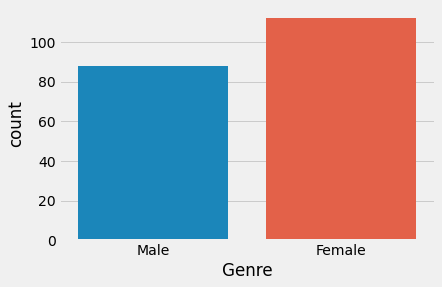

In [27]:
sns.countplot(df2['Genre'])

In [29]:
fig=px.histogram(df2,x='Spending Score (1-100)',color='Genre')
fig.show()

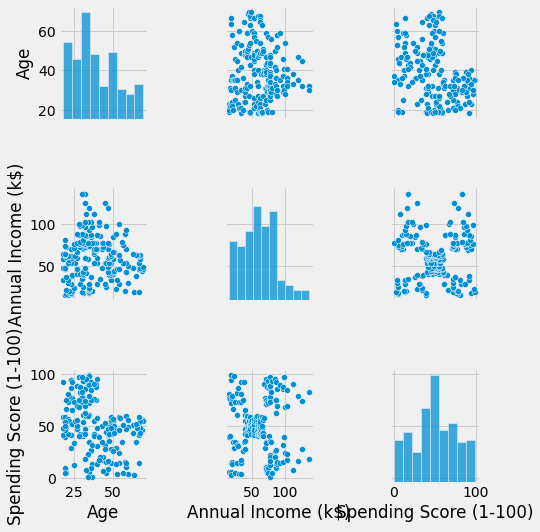

In [30]:
sns.pairplot(df2)

In [ ]:
#scatter plot

In [31]:
df2.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [32]:
px.scatter(df2,x='Age',y='Annual Income (k$)',color='Genre')

In [ ]:
#scatter plot in between annual income and spending score wrt to genre

In [34]:
px.scatter(df2,y='Spending Score (1-100)',x='Annual Income (k$)',color='Genre')

In [ ]:
#boxplot

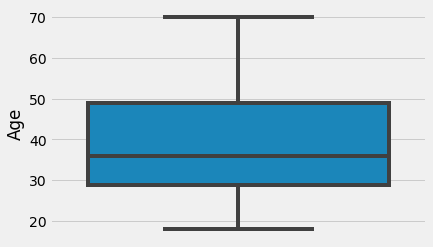

In [37]:
sns.boxplot(y=df2['Age'])

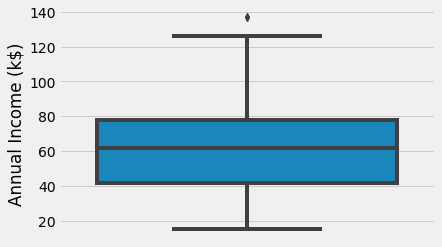

In [38]:
sns.boxplot(y=df2['Annual Income (k$)'])

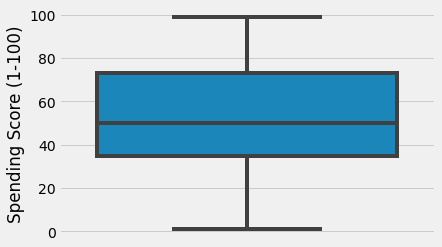

In [39]:
sns.boxplot(y=df2['Spending Score (1-100)'])

In [ ]:
#3d scatter plot

In [41]:
px.scatter_3d(df2,x='Age',z='Spending Score (1-100)',y='Annual Income (k$)',color='Genre')

In [ ]:
#clustering using K-means
#Clustering with considering annual income and spending score

In [47]:
df2.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [48]:
x=df2[[ 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values

In [49]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

In [51]:
wcss[0:5]

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337]

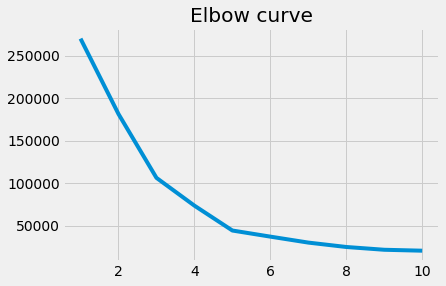

In [52]:
plt.plot(range(1,11),wcss)
plt.title('Elbow curve')
plt.show()

In [54]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)

In [56]:
y_kmeans=kmeans.fit_predict(x)

In [57]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [58]:
x[0:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

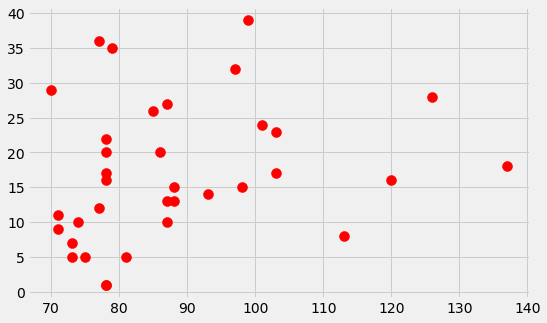

In [61]:
plt.figure(figsize=(8,5))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Cluster 1')

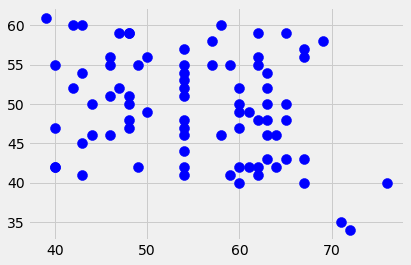

In [62]:
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')

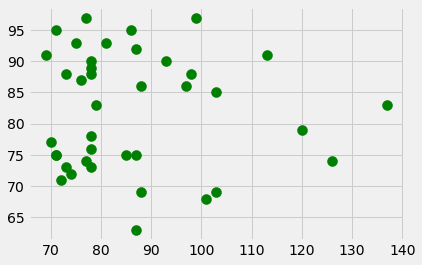

In [63]:
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Cluster 3')

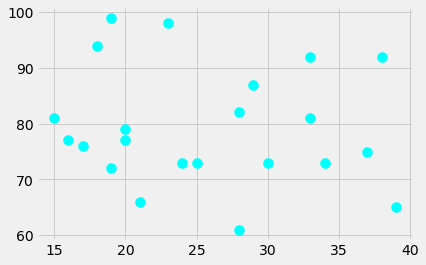

In [64]:
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='cyan',label='Cluster 4')

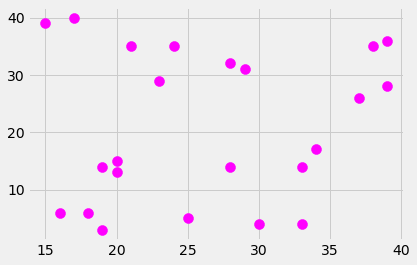

In [65]:
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='magenta',label='Cluster 5')

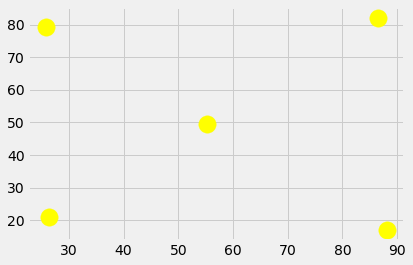

In [67]:
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

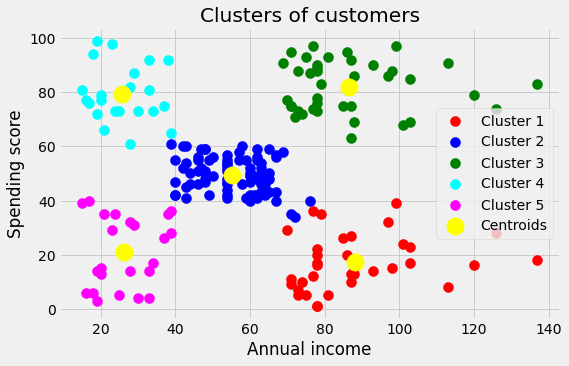

In [68]:
plt.figure(figsize=(8,5))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='cyan',label='Cluster 4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='magenta',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.legend()
plt.show()


In [ ]:
#clustering using Age,annual income and spending score

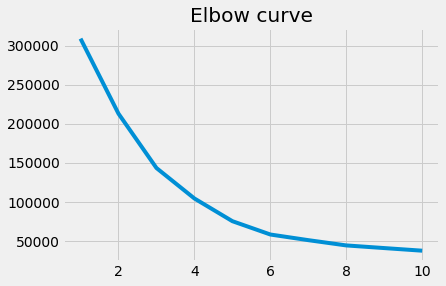

In [94]:
x=df2[['Age','Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow curve')
plt.show()

In [95]:
kmeans=KMeans(n_clusters=6,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans.fit(x)
label3=kmeans.labels_
centroid=kmeans.cluster_centers_

In [97]:
df2['label3']=label3
trace1=go.Scatter3d(x=df2['Age'],y=df2['Spending Score (1-100)'],z=df2['Annual Income (k$)'],
                    mode='markers',
                    marker=dict(color=df2['label3'],line=dict(color=df2['label3'],width=2),))
data=[trace1]
layout=go.Layout(
    title='Clusters',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending score'),
        zaxis=dict(title='Annual income')
    )
)
fig=go.Figure(data=data,layout=layout)
py.offline.iplot(fig)